In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
events_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/event_data_train.zip")

In [5]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [6]:
  events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
events_data['data'] = pd.to_datetime(events_data.timestamp, unit = 's')

In [8]:
events_data.head(10)

,step_id,timestamp,action,user_id,data
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [10]:
events_data.data.min()
events_data.data.max()

Timestamp('2018-05-19 23:33:31')

In [11]:
events_data['day'] = events_data['data'].dt.date

In [12]:
events_changed = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()
events_changed 

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [13]:
events_changed[['user_id','viewed']].

SyntaxError: invalid syntax (<ipython-input-13-37e30c1255b5>, line 1)

<AxesSubplot:xlabel='day'>

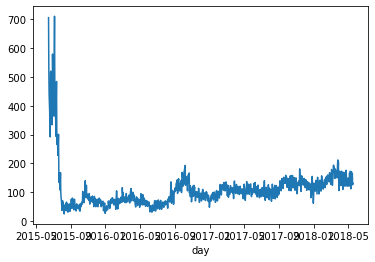

In [14]:
events_data.groupby('day').user_id.nunique().plot()

In [15]:
#events_data[events_data.action == 'passed'] \
 #   .groupby('user_id', as_index=False) \
  #  .agg({'step_id':'count'}) \
  #  .rename(columns = {'step_id': 'passed_step'}).passed_step.hist()#

In [75]:
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [78]:
users_data = users_data.merge(users_events_data, how = 'outer')

In [80]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [81]:
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [17]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [18]:
submissions_data['data'] = pd.to_datetime(submissions_data.timestamp, unit = 's')

In [19]:
submissions_data['day'] = submissions_data['data'].dt.date

In [20]:
submissions_data

,step_id,timestamp,submission_status,user_id,data,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [52]:
users_scores = submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [54]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset='day')\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [55]:
gap_data=pd.Series(np.concatenate(gap_data,axis=0))

In [56]:
gap_data = gap_data/(24*60*60)

<AxesSubplot:>

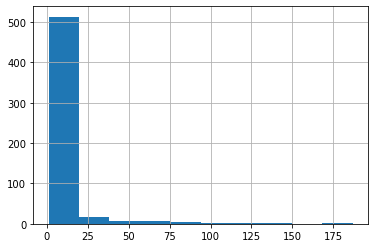

In [57]:
gap_data[gap_data<200].hist()

In [58]:
gap_data.quantile(0.9)

15.203456018518565

In [59]:
events_data.tail()

,step_id,timestamp,action,user_id,data,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [60]:
users_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp':"max"}).head().rename(columns={'timestamp':'last_timestamp'})

In [61]:
now = 1526772811
drop_out_threshold = 2592000

In [62]:
users_time['is_gone_user'] = (now - users_time.last_timestamp)>drop_out_threshold

In [65]:
users_time.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [66]:
30*24*60*60

2592000

In [67]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [72]:
users_data = users_time.merge(users_scores, on='user_id', how='outer')

In [73]:
users_data  = users_data .fillna(0)

In [82]:
users_data = users_data.merge(users_days, how = 'outer')

In [86]:
users_data.user_id.nunique() == events_data.user_id.nunique()

True

In [90]:
users_data['passed_course'] = users_data.passed > 170

In [92]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_scores
passed_course,,,,,,,,,,,
False,17809,8517,8517,8517,8517,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425
